# **L1 and L2 Regression**

# **Load Data:** (California Housing Price Prediction using Lasso & Ridge Regression)  :

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Price"] = california.target

df.to_csv("california_housing.csv", index=False)

# **Train Lasso & Ridge Models**

In [9]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

# Load dataset
df = pd.read_csv("/content/california_housing.csv")

# Select features and target
X = df.drop(columns=["Price"])
y = df["Price"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Train Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)




# **Evaluate Models**


🔹 Lasso Regression
   Mean Squared Error (MSE): 0.6796
   R² Score: 0.4814

🔹 Ridge Regression
   Mean Squared Error (MSE): 0.5559
   R² Score: 0.5758


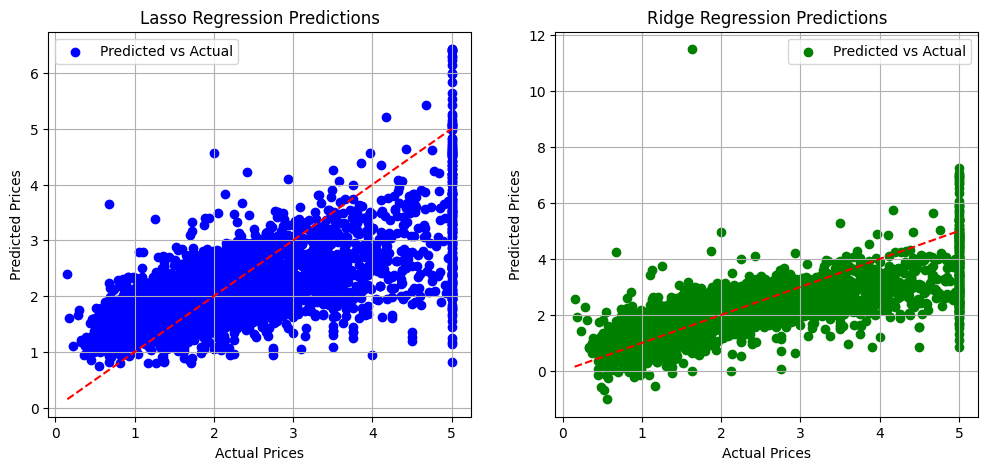

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Evaluate performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\n🔹 Lasso Regression")
print(f"   Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"   R² Score: {r2_lasso:.4f}")

print(f"\n🔹 Ridge Regression")
print(f"   Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"   R² Score: {r2_ridge:.4f}")

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 5))

# Lasso Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression Predictions")
plt.legend()
plt.grid()

# Ridge Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color="green", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression Predictions")
plt.legend()
plt.grid()

plt.show()